# Pandas

In [1]:
import numpy as np
import pandas as pd

## Series and dataframe
 - series -> 1 dim array
 - index --> 1 on 1 adress
 - similar with dictionary
 - key of dictionary --> index, value of dictionary --> value
 
 - dataframe - 2 dims array
 - series gathering
 - index -> [,] 2 indices
 

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1], index = [2,5, 3, 7]) # value = list or numpy array
data
data[2]

0.25

In [3]:
population_dict = {'Ca':335, 'T;':235, 'N' :3434} # make series from dictionary
population = pd.Series(population_dict)
population

Ca     335
T;     235
N     3434
dtype: int64

In [4]:
population['Ca']

335

In [5]:
population['Ca':'T;'] # slicing by index (different with dictionary!)

Ca    335
T;    235
dtype: int64

### dictionary between series
 --> sorted by key
 --> series --> sorted by input order

## Dataframe
 - row index + column name
 - continuous serieses


In [6]:
area = {'Ca':3433, 'T;' : 12, 'N': 21523}
states = pd.DataFrame({'population':population, 'area':area}) # combine two serieses, input order
states

,population,area
Ca,335,3433
T;,235,12
N,3434,21523


In [7]:
states.index

Index(['Ca', 'T;', 'N'], dtype='object')

In [8]:
states.columns

Index(['population', 'area'], dtype='object')

In [9]:
states['area'] # area series

Ca     3433
T;       12
N     21523
Name: area, dtype: int64

In [10]:
pd.DataFrame(population, columns = ['population'])

,population
Ca,335
T;,235
N,3434


In [11]:
pd.DataFrame(population, index = ['T;'], columns = ['population'])

,population
T;,235


In [12]:
pd.DataFrame([{'a':1, 'b':2}, {'b':3, 'c':4}]) # NaN Not a number

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [13]:
pd.DataFrame(np.random.rand(3, 2), columns = ['a', 'b'], index = ['c', 'd', 'e'])

,a,b
c,0.874147,0.304706
d,0.897158,0.053939
e,0.639591,0.047297


## index object

 - Index (Capital I) , tuple array
 - array 와 다른 점 -> index object 는  tuple
 - 집합 연산
 
 ## indexer
  - loc - 인덱스 이름, 범위지정 가능(끝 포함) ['a':'c'] -> 'a', 'b', 'c'
  - iloc - 정수형 위치 인덱스, 범위지정 가능 (끝 제외) [3:7] -> 3, 4, 5, 6

In [14]:
ind = pd.Index([2, 3, 4, 6, 7])
ind

Int64Index([2, 3, 4, 6, 7], dtype='int64')

In [15]:
ind[1]
ind[2:]

Int64Index([4, 6, 7], dtype='int64')

In [19]:
print(ind.size, ind.shape)

5 (5,)


In [20]:
indA = pd.Index([1,36,7,12,41])
indB = pd.Index([4,2,5,6,8])
indA & indB # intersection

<ipython-input-20-06ae7f8a51e6>:3: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  indA & indB # intersect


Int64Index([], dtype='int64')

In [21]:
indA | indB # union

<ipython-input-21-2c4bfb638f37>:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  indA | indB


Int64Index([1, 2, 4, 5, 6, 7, 8, 12, 36, 41], dtype='int64')

In [22]:
indA ^ indB # difference

<ipython-input-22-026306a03487>:1: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead
  indA ^ indB # minus


Int64Index([1, 2, 4, 5, 6, 7, 8, 12, 36, 41], dtype='int64')

In [26]:
data.loc[7]

1.0

In [32]:
data.loc[2:7]

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [27]:
data.iloc[3]

1.0

In [30]:
states.area

Ca     3433
T;       12
N     21523
Name: area, dtype: int64

In [31]:
states['area']

Ca     3433
T;       12
N     21523
Name: area, dtype: int64

In [34]:
states['density'] = states.population / states.area
states

,population,area,density
Ca,335,3433,0.097582
T;,235,12,19.583333
N,3434,21523,0.159550


In [43]:
states.daf = states['population'] / 10 # series object
states

,population,area,density
Ca,335,3433,0.097582
T;,235,12,19.583333
N,3434,21523,0.159550


In [36]:
states.values # 2dim array

array([[3.35000000e+02, 3.43300000e+03, 9.75822895e-02],
       [2.35000000e+02, 1.20000000e+01, 1.95833333e+01],
       [3.43400000e+03, 2.15230000e+04, 1.59550249e-01]])

In [37]:
states.values[0] # first array

array([3.35000000e+02, 3.43300000e+03, 9.75822895e-02])

In [44]:
x = states.population + states.area # it can do that if the indices are different -> fill_value = NaN
x

Ca     3768
T;      247
N     24957
dtype: int64

In [47]:
states30 = states / 30
states30

,population,area,density
Ca,11.166667,114.433333,0.003253
T;,7.833333,0.400000,0.652778
N,114.466667,717.433333,0.005318


## file open in pandas

csv_test = pd.read_csv('filename')
csv_test.to_csv('filename')

csv_test.head(), .tail()
csv_test.shape() --> number of row, col by tuple
csv_test.info()
csv_test.dtypes --> column specific okay
csv_test.describe() --> stat abstract
csv_test.count() --> number of values --> return series
csv_test.value_counts() --> key : row index, value : the number of data count --> series
csv_test.mean() --> all column's average
csv_test.median()
csv_test.max() --> return series
csv_test.min()
csv_test.std()
csv_test.corr() --> correlation

## pandas built-in graph
csv_test.plot()
kind = type of plot


<AxesSubplot:>

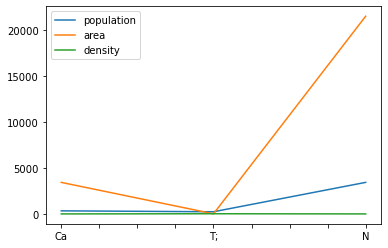

In [49]:
states.plot()

<AxesSubplot:>

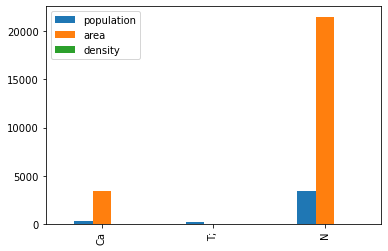

In [50]:
states.plot(kind = 'bar')

<AxesSubplot:ylabel='Frequency'>

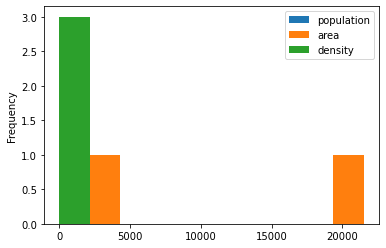

In [51]:
states.plot(kind = 'hist')

<AxesSubplot:xlabel='population', ylabel='area'>

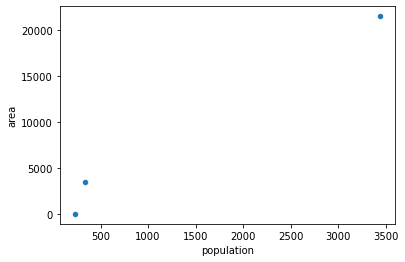

In [54]:
states.plot(x = 'population', y = 'area', kind = 'scatter')

<AxesSubplot:>

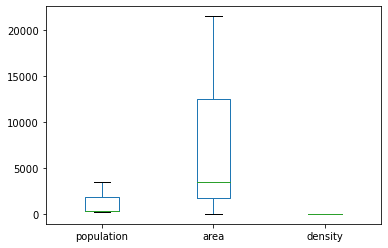

In [55]:
states.plot(kind = 'box')

## data uniquization
.duplicated() - first row True, others -> False
. drop_duplicates() - remove overlapped row, if want to change original as well, inplace = True


In [56]:
dataset = pd.DataFrame({'c1':['a','a','b', 'a', 'b'], 
                       'c2': [1,1,1,2,1], 
                       'c3': [1,1,2,2,2]})
dataset

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,1,2


In [57]:
s = dataset.duplicated()
s

0    False
1     True
2    False
3    False
4     True
dtype: bool

In [58]:
c3_dup = dataset['c3'].duplicated()
c3_dup

0    False
1     True
2    False
3     True
4     True
Name: c3, dtype: bool

In [59]:
dataset2 = dataset.drop_duplicates()
dataset2

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2


In [60]:
dataset_sub = dataset.drop_duplicates(subset = ['c2', 'c3'])
dataset_sub

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2
